In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_house = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data.csv")
df_house

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_17800\2361683599.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_house = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\kc_house_data.csv")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,4254000620,20141007T000000,410000.0,3,2.50,1860,15457,2.0,0,0,...,8,1860,0,1997,0,98019,47.7383,-121.955,2040,14055
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,...,7,1802,0,1961,0,98125,47.7205,-122.323,1810,7332
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,...,12,3420,1060,1902,0,98112,47.6275,-122.315,3220,5600
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,...,7,940,370,1980,0,98031,47.3958,-122.189,1400,7161


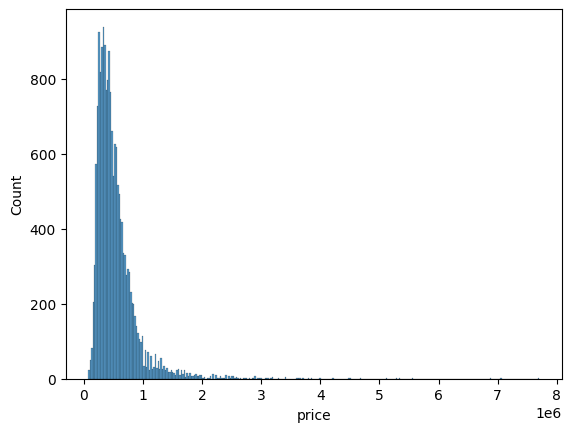

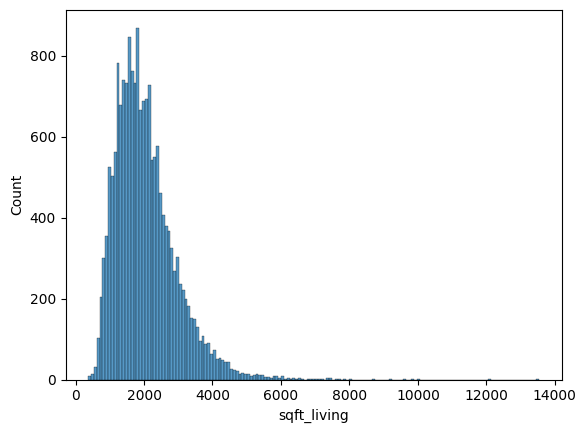

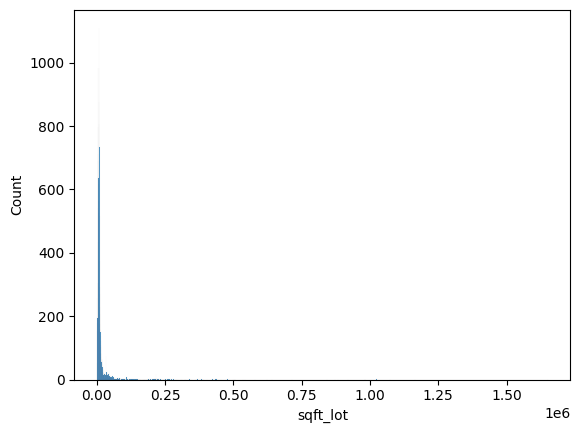

In [5]:
cols_of_interest = ['price','sqft_living','sqft_lot']

for features in cols_of_interest:
    sns.histplot(df_house[features])
    plt.show()
    

In [ ]:
# Find the skewness using pandas skew() function

skewvals = df_house[cols_of_interest].skew()
skewvals # All of the values are highly right skewed

price           4.224266
sqft_living     1.546099
sqft_lot       13.320285
dtype: float64

In [8]:
# Make a new column for the skewed values 

for feature in cols_of_interest:
    df_house['log_' + feature] = np.log(df_house[feature]) # Take natural log

df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors,log_price,log_sqft_living,log_sqft_lot
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,8.639411
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,7.851661,8.887653
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,9.210340
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,8.517193
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,8.997147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,4254000620,20141007T000000,410000.0,3,2.50,1860,15457,2.0,0,0,...,1997,0,98019,47.7383,-121.955,2040,14055,12.923912,7.528332,9.645817
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,...,1961,0,98125,47.7205,-122.323,1810,7332,12.676076,7.496652,9.325899
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,...,1902,0,98112,47.6275,-122.315,3220,5600,14.503645,8.407378,8.517193
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,...,1980,0,98031,47.3958,-122.189,1400,7161,12.441145,7.177782,8.871786


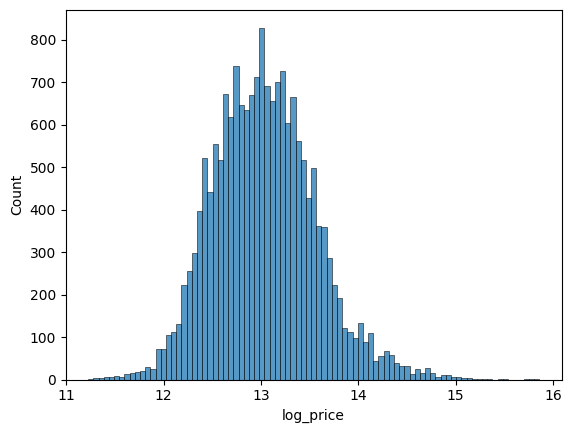

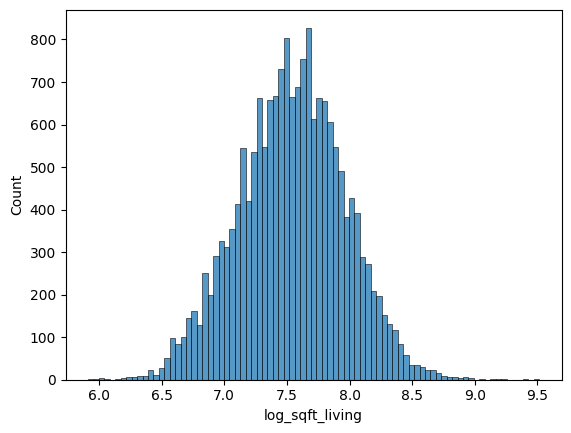

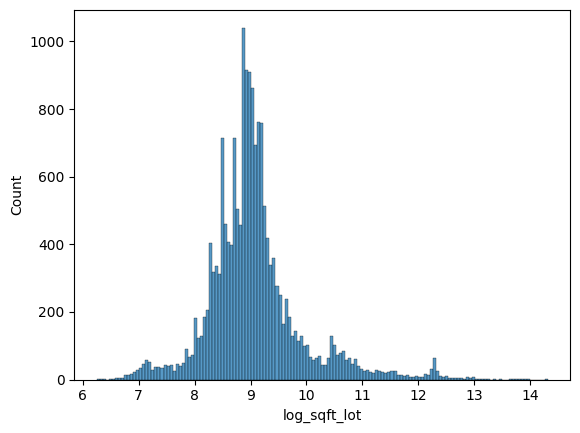

In [13]:
for features in cols_of_interest:
    sns.histplot(df_house['log_' + features])
    plt.show()

In [14]:
# Check for skewness again

log_cols = ['log_price', 'log_sqft_living', 'log_sqft_lot']

df_house[log_cols].skew()

log_price          0.413807
log_sqft_living   -0.035521
log_sqft_lot       1.230832
dtype: float64

## Scenario 1 - Hetroskedastic Errors in Linear Model

[Text(0.5, 1.0, 'sqft_lot vs price')]

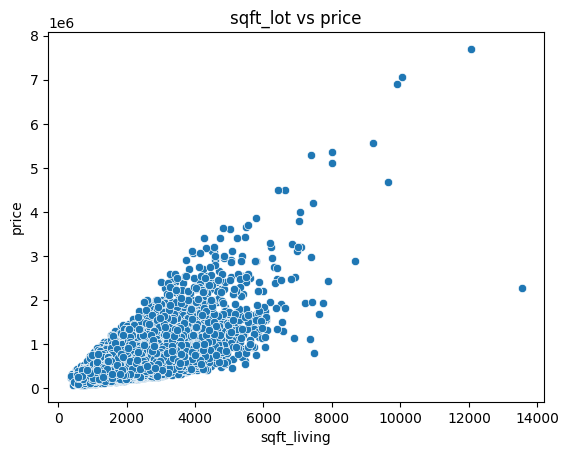

In [16]:
# Scatterplots to visualise the correlations
ax = sns.scatterplot(data=df_house, x="sqft_living", y="price")
ax.set(title = 'sqft_lot vs price')

[Text(0.5, 1.0, 'log_sqft_living vs log_price')]

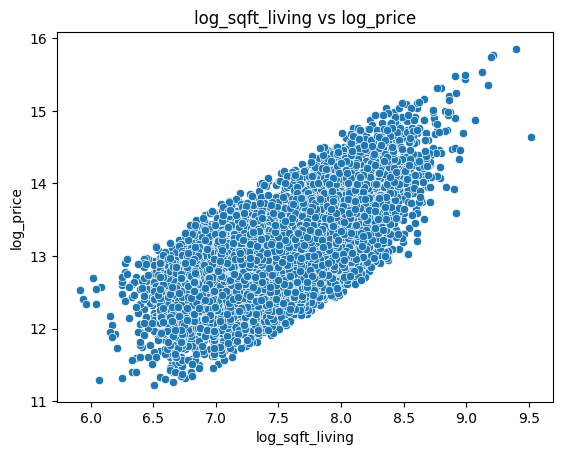

In [17]:
ax = sns.scatterplot(data=df_house, x="log_sqft_living", y="log_price")
ax.set(title = 'log_sqft_living vs log_price')

[Text(0.5, 1.0, 'sqft_lot vs price')]

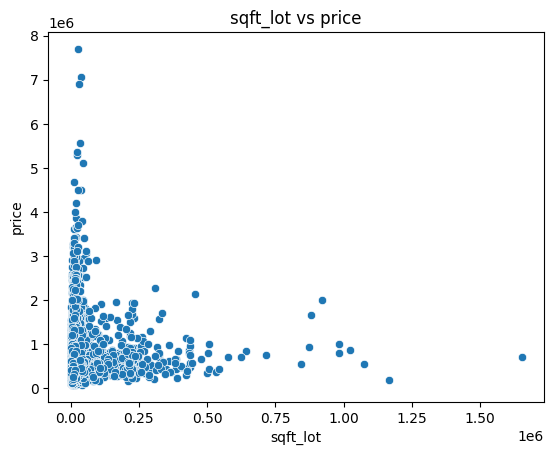

In [18]:
# Between sqft_lot and price

ax = sns.scatterplot(data=df_house, x="sqft_lot", y="price")
ax.set(title = 'sqft_lot vs price')

[Text(0.5, 1.0, 'log_sqft_lot vs log_price')]

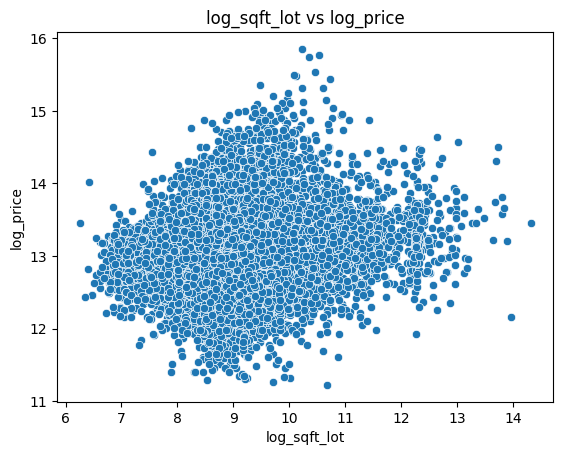

In [19]:
ax = sns.scatterplot(data=df_house, x="log_sqft_lot", y="log_price")
ax.set(title = 'log_sqft_lot vs log_price')

# Exercise - Identifying skewness of variable

In [21]:
# Import the phone dataset

df_phone = pd.read_csv("D:\\Coding\\Coursera\\Data Prep for ML in Python Coursera\\Data-Prep-for-ML\\EDA\\phone_marketplace_dataset.csv")
df_phone

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22


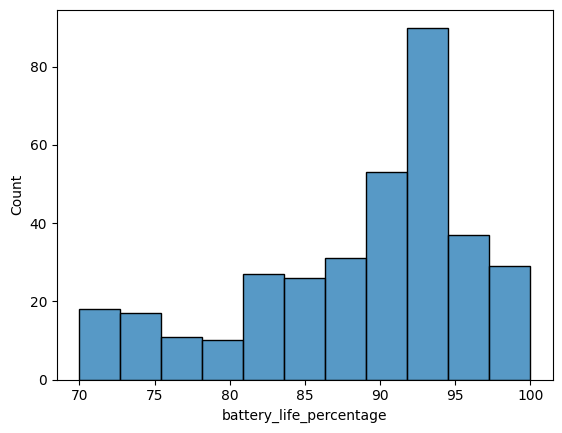

In [27]:
sns.histplot(df_phone['battery_life_percentage'])
plt.show()

In [28]:
df_phone['battery_life_percentage'].skew()

np.float64(-0.817025535352887)

In [29]:
# Create 4 new columns using different transformations techniques

df_phone['log_battery'] = np.log(df_phone['battery_life_percentage'])
df_phone['log10_battery'] = np.log10(df_phone['battery_life_percentage'])
df_phone['sqrt_battery'] = np.sqrt(df_phone['battery_life_percentage'])
df_phone['squared_battery'] = np.power(df_phone['battery_life_percentage'], 2)
df_phone['cubed_battery'] = np.power(df_phone['battery_life_percentage'], 3)
df_phone

,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel,log_battery,log10_battery,sqrt_battery,squared_battery,cubed_battery
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12,4.304065,1.869232,8.602325,5476,405224
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16,4.543295,1.973128,9.695360,8836,830584
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22,4.574711,1.986772,9.848858,9409,912673
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20,4.499810,1.954243,9.486833,8100,729000
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16,4.510860,1.959041,9.539392,8281,753571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1326,2022,iPhone_14,91,64,yes,craigslist,0,0,no,1394,1,22,4.510860,1.959041,9.539392,8281,753571
345,458,2019,iPhone_11,75,256,no,facebook,3,3,no,702,2,12,4.317488,1.875061,8.660254,5625,421875
346,487,2019,iPhone_11,87,256,no,facebook,1,7,no,781,2,12,4.465908,1.939519,9.327379,7569,658503
347,1340,2022,iPhone_14,100,256,yes,craigslist,0,0,no,1411,1,22,4.605170,2.000000,10.000000,10000,1000000


In [ ]:
transform_cols = ['log_battery','log10_battery','sqrt_battery', 'squared_battery', 'cubed_battery']
df_phone[transform_cols].skew()

# cubed_battery have the lowest skewness hence the one to be used

log_battery       -0.975281
log10_battery     -0.975281
sqrt_battery      -0.896225
squared_battery   -0.658463
cubed_battery     -0.500097
dtype: float64

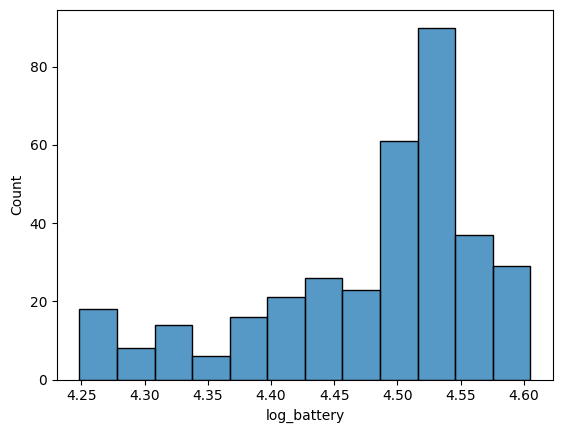

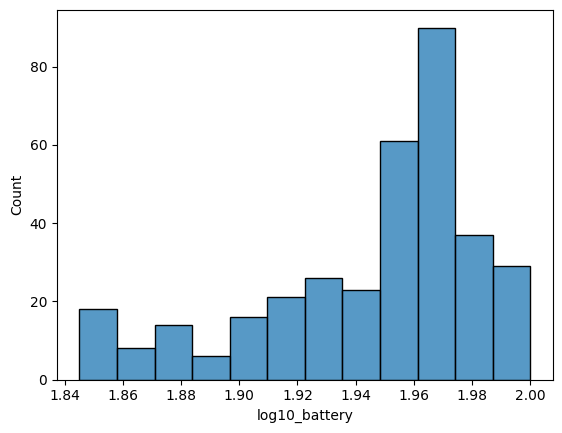

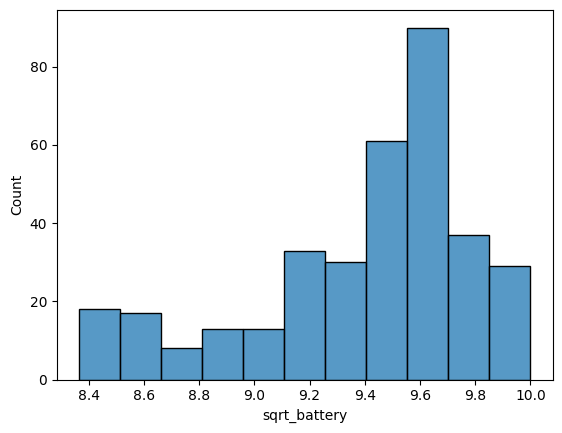

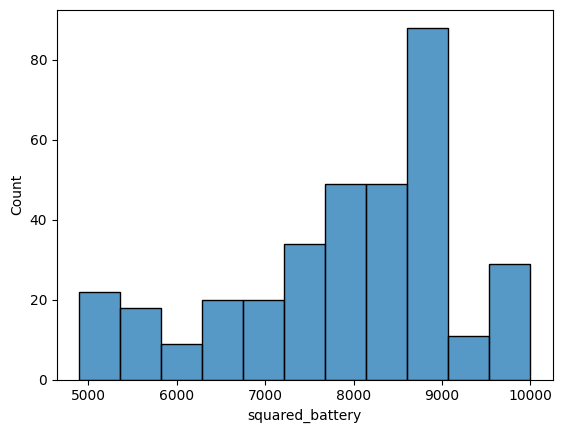

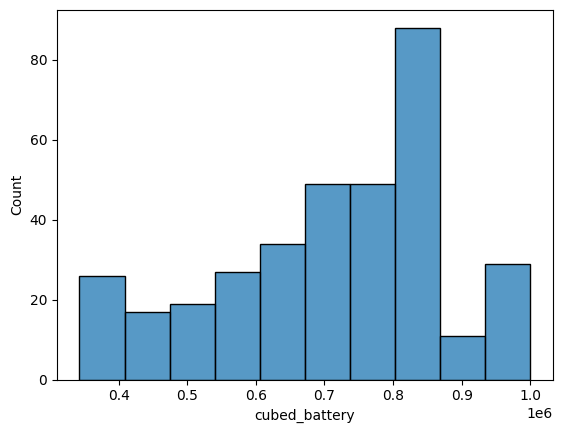

In [31]:
for features in transform_cols:
    sns.histplot(df_phone[features])
    plt.show()